In [1]:
from keras.modelsrt models, layers
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()
index_word = dict([(value, key) for key, value in word_index.items()])

In [22]:
[(key, index_word[key]) for key in sorted(index_word.keys())]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [28]:
' '.join([index_word.get(i-3, '?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
def vectorize(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, seq in enumerate(data):
        results[i, seq] = 1.
    return results

In [5]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

y_train = np.asfarray(train_labels)
y_test = np.asfarray(test_labels)

In [7]:
len(x_train)

25000

In [8]:
x_train_eval = x_train[:10000]
y_train_eval = y_train[:10000]
x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [11]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=512, 
                    validation_data=(x_train_eval, y_train_eval))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 329us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.3006 - acc: 0.9043 - val_loss: 0.3003 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2180 - acc: 0.9287 - val_loss: 0.3082 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1751 - acc: 0.9435 - val_loss: 0.2839 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.1150 - acc: 0.9653 - val_loss: 0.3144 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.0979 - acc: 0.9706 - val_loss: 0.3128 - 

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

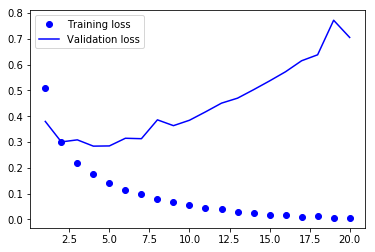

In [23]:
plt.plot(range(1, 21), history.history['loss'], 'bo', label='Training loss')
plt.plot(range(1, 21), history.history['val_loss'], 'b', label='Validation loss')
plt.legend()

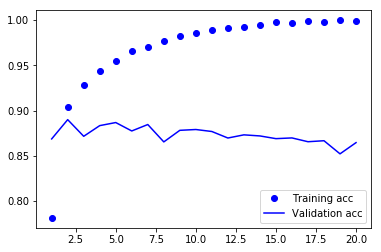

In [24]:
plt.plot(range(1, 21), history.history['acc'], 'bo', label='Training acc')
plt.plot(range(1, 21), history.history['val_acc'], 'b', label='Validation acc')
plt.legend()